# 📊UK Food Nutritional Health Analysis

Exploring sugar, fat, salt, additives & palm oil across everyday food products.

I analyse nutritional patterns across categories, compare ingredient relationships (e.g., sugar vs fat, sugar vs salt), and investigate whether additives or palm oil affect sugar levels.

**Being mindful of sugar intake is important**
1. It affects how fast your skin ages
2. It impacts energy stability
3. It increases inflammation
4. It affects hunger and weight pathways
5. It affects long-term metabolic health


#Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [ ]:
#Load dataset
df = pd.read_csv("/content/foodfacts.csv",low_memory=False)

#Preview first rows
df.head()


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,4559,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,16087,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,16094,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#📌  Exploration

Before looking for patterns, we need to understand the dataset’s **size, structure, and data quality**.

For this project we focus on:

- `sugars_100g` – grams of sugar per 100g  
- `fat_100g` – grams of fat per 100g  
- `salt_100g` – grams of salt per 100g  
- `energy_100g` – energy in kJ per 100g  
- `additives_count` – how many additives are listed in the product  
- `palm_oil` – whether the ingredients list explicitly contains palm oil  

In this step we check:

- `df_small.shape` → how many rows and columns we have  
- `df_small.info()` → column types + how many missing values  
- `df_small.describe()` → summary stats to spot ranges and weird values  
- `df_small.isna().sum()` → remaining missing values per column  

This makes sure the data is in a reliable state before we start plotting and comparing foods.

### Choosing the columns we care about

From 160+ columns, I will keep only those related to:
- what the product is (name, brand, category, country)  
- nutritional values (sugar, fat, salt, energy)  
- processing indicators (number of additives, palm-oil ingredients)

In [ ]:
useful_cols = [
    "product_name",
    "brands",
    "categories_en",
    "countries_en",
    "sugars_100g",
    "fat_100g",
    "salt_100g",
    "energy_100g",
    "additives_n",
    "ingredients_from_palm_oil_n"
]

df_small = df[useful_cols].copy()
df_small.head()

,product_name,brands,categories_en,countries_en,sugars_100g,fat_100g,salt_100g,energy_100g,additives_n,ingredients_from_palm_oil_n
0,Farine de blé noir,Ferme t'y R'nao,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN
1,Banana Chips Sweetened (Whole),NaN,NaN,United States,14.29,28.57,0.00000,2243.0,0.0,0.0
2,Peanuts,Torn & Glasser,NaN,United States,17.86,17.86,0.63500,1941.0,0.0,0.0
3,Organic Salted Nut Mix,Grizzlies,NaN,United States,3.57,57.14,1.22428,2540.0,0.0,0.0
4,Organic Polenta,Bob's Red Mill,NaN,United States,NaN,1.43,NaN,1552.0,0.0,0.0


#🧼Cleaning the data
Data cleaning ensures the dataset is accurate, consistent, and ready for analysis. It removes missing values, incorrect entries, wrong formats, and duplicates. Without cleaning, results can be misleading or completely wrong. Clean data makes patterns clearer, graphs more readable, and conclusions far more reliable.

In [ ]:
df_small = df[df["countries_en"].fillna("").str.contains("United Kingdom", case=False)].copy()

df_small = df_small.rename(columns={
    "categories_en": "category",
    "sugars_100g": "sugars_100g",
    "fat_100g": "fat_100g",
    "salt_100g": "salt_100g",
    "additives_n": "additives_count",
    "ingredients_from_palm_oil_n": "palm_oil_count",
    "energy_100g": "energy_100g",
})

# convert numeric
for col in ["sugars_100g", "fat_100g", "salt_100g", "energy_100g", "additives_count", "palm_oil_count"]:
    df_small[col] = pd.to_numeric(df_small[col], errors="coerce")

# only drop rows missing sugar, fat, or salt
df_small = df_small.dropna(subset=["sugars_100g", "fat_100g", "salt_100g"])

### Checking the cleaned dataset

Now I re-check the data after cleaning to make sure:
- it only contains UK products  
- numeric columns are actually numeric  
- missing values are under control  

This gives a trustworthy base before I start plotting and comparing things.

In [ ]:
print("After cleaning – shape (rows, columns):", df_small.shape)

print("\nColumn info (cleaned dataset):")
df_small.info()

print("\nSummary statistics (only the numeric columns we care about):")
display(df_small[numeric_cols].describe().T)

print("\nMissing values per column (cleaned dataset):")
df_small.isna().sum()

After cleaning – shape (rows, columns): (2118, 163)

Column info (cleaned dataset):
<class 'pandas.core.frame.DataFrame'>
Index: 2118 entries, 227 to 355915
Columns: 163 entries, code to water-hardness_100g
dtypes: float64(107), object(56)
memory usage: 2.7+ MB

Summary statistics (only the numeric columns we care about):


,count,mean,std,min,25%,50%,75%,max
sugars_100g,2118.0,15.201240,21.302445,0.0,1.000000,4.50000,21.97500,100.0
fat_100g,2118.0,14.004956,17.973573,0.0,0.800000,6.70000,22.00000,100.0
salt_100g,2118.0,0.991424,6.697550,0.0,0.089916,0.29972,1.00769,297.6
energy_100g,2115.0,1119.304440,788.758695,0.0,423.000000,1032.00000,1665.00000,3761.0
additives_count,1894.0,1.760296,2.377609,0.0,0.000000,1.00000,3.00000,17.0
palm_oil_count,1894.0,0.020063,0.140254,0.0,0.000000,0.00000,0.00000,1.0



Missing values per column (cleaned dataset):


,0
code,0
url,0
creator,0
created_t,0
created_datetime,0
...,...
carbon-footprint_100g,2117
nutrition-score-fr_100g,56
nutrition-score-uk_100g,56
glycemic-index_100g,2118


### 1. Does more sugar always mean more calories?

Here I compare sugar with total energy per 100g to see how tightly they move together.


There is a clear upward pattern: products with more sugar per 100g generally also have higher energy per 100g. This makes sense because sugar contributes directly to calories. However, the spread shows that some lower-sugar products can still be relatively high in energy, likely due to fat or other ingredients.

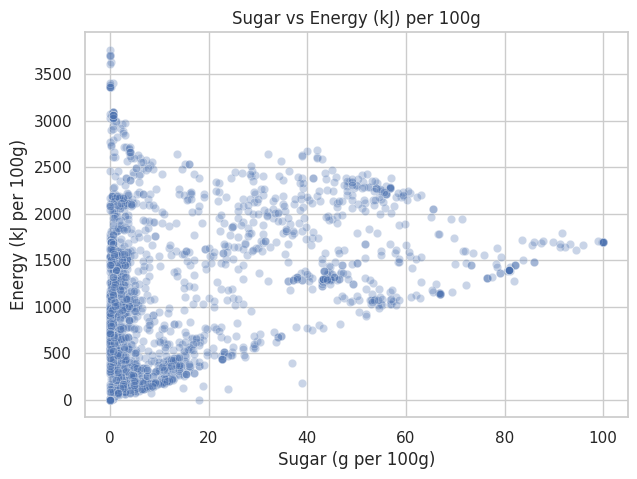

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=df_small.sample(min(3000, len(df_small))),  # sample so the plot isn't too dense
    x="sugars_100g",
    y="energy_100g",
    alpha=0.3
)
plt.title("Sugar vs Energy (kJ) per 100g")
plt.xlabel("Sugar (g per 100g)")
plt.ylabel("Energy (kJ per 100g)")
plt.show()

### 2. Which categories are the sugariest?

I look at the top 6 categories (by number of products) and compare their sugar levels.

The graph clearly shows that not all food categories contribute to sugar intake equally. Only a few groups — mainly sugary snacks and certain plant-based items — contain very high sugar levels, while everyday foods like meats, meals and dairy are consistently low.

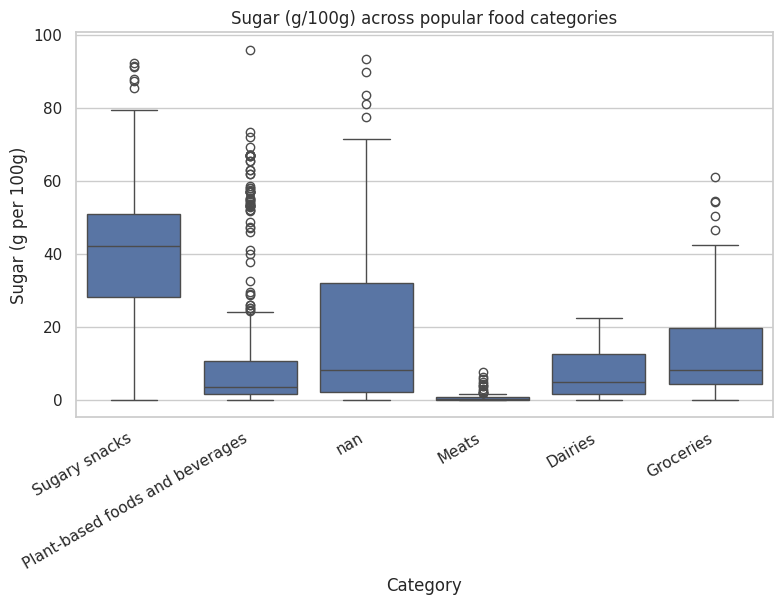

In [ ]:
# Pick the 6 most common categories
df_small["main_category"] = df_small["category"].astype(str).str.split(",").str[0].str.strip()

# Now use main_category instead of category
top_cats = (
    df_small["main_category"]
    .value_counts()
    .head(6)
    .index
)

plt.figure(figsize=(9,5))
sns.boxplot(
    data=df_small[df_small["main_category"].isin(top_cats)],
    x="main_category",
    y="sugars_100g"
)

plt.title("Sugar (g/100g) across popular food categories")
plt.xlabel("Category")
plt.ylabel("Sugar (g per 100g)")
plt.xticks(rotation=30, ha="right")
plt.show()

### 3. Are lower-fat foods actually higher in sugar?

Here I compare sugar against fat to see if some products keep fat low but push sugar up.

This scatter plot shows that most UK packaged foods are either high in sugar or high in fat—rarely both at the same time.

There is a large cluster of products that are very low in fat (0–5g) but have a wide range of sugar levels, including some extremely sugary items over 80g/100g.

Conversely, foods that are high in fat (above ~30g/100g) tend to have very low sugar, often close to zero.

Because the dots do not form an upward or downward trend, there is no strong correlation between sugar and fat.

Overall: products tend to specialise in one type of “unhealthy”—they’re usually sugary or fatty, but not both. This explains why biscuits and sweets pile up on the sugar side, while rich foods like cheese or processed meats sit on the high-fat, low-sugar end.

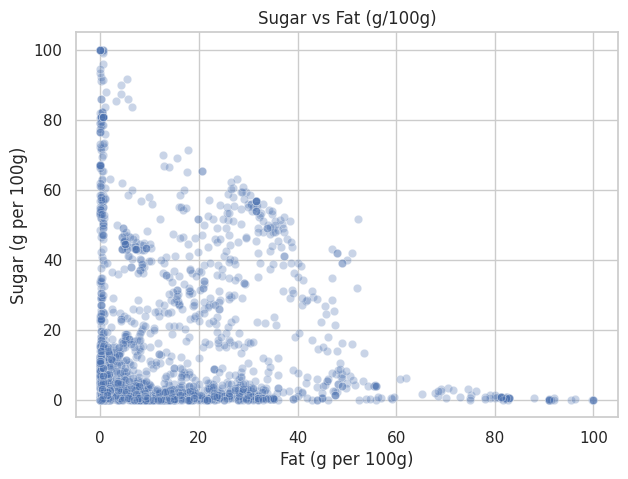

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=df_small.sample(min(3000, len(df_small))),
    x="fat_100g",
    y="sugars_100g",
    alpha=0.3
)
plt.title("Sugar vs Fat (g/100g)")
plt.xlabel("Fat (g per 100g)")
plt.ylabel("Sugar (g per 100g)")
plt.show()

### 4. Sugar vs salt – double trouble?

This shows whether products that are high in sugar also tend to be high in salt.

The plot shows no real relationship between sugar and salt content in UK packaged foods. Most products cluster very low in salt (0–5g per 100g), but their sugar levels vary massively—from almost 0g up to over 100g. This means foods that are very sweet aren’t necessarily salty, and salty foods aren’t usually sweet.

A few extreme outliers appear far along the salt axis, likely very salty processed items, but they do not carry high sugar. Overall, sugar and salt behave independently, suggesting that products tend to be formulated to be either sweet or salty—not both.

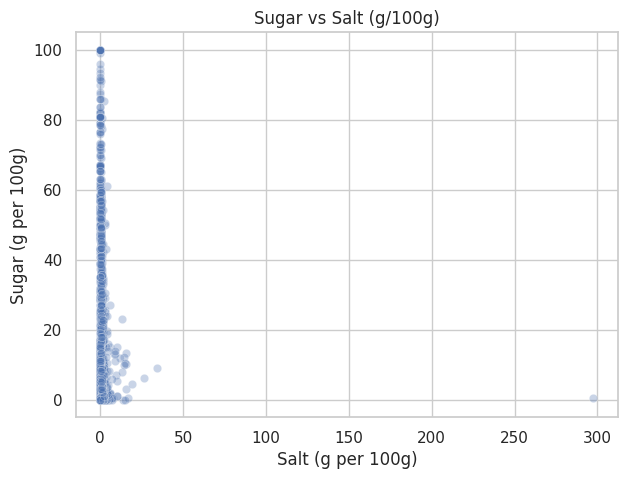

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=df_small.sample(min(3000, len(df_small))),
    x="salt_100g",
    y="sugars_100g",
    alpha=0.3
)
plt.title("Sugar vs Salt (g/100g)")
plt.xlabel("Salt (g per 100g)")
plt.ylabel("Sugar (g per 100g)")
plt.show()

### 5. Do highly processed foods (more additives) also have more sugar?

Here I group products by their **number of additives** and compare average sugar.

This chart shows a clear upward pattern: foods with more additives tend to contain higher levels of sugar per 100g. Products with 0–3 additives usually stay below 20g of sugar, while products with 10 or more additives often rise well above 30g, with some even hitting 60g+.

This suggests that highly processed foods—those with lots of additives—are more likely to be sweetened or engineered for taste, leading to higher sugar content. While there are a few exceptions, the overall trend is that the more additives a food has, the sweeter it tends to be.


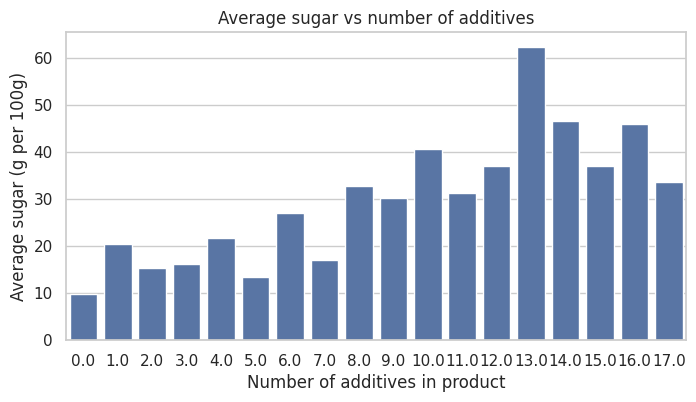

In [ ]:
additive_sugar = (
    df_small
    .groupby("additives_count")["sugars_100g"]
    .mean()
    .reset_index()
    .sort_values("additives_count")
)

plt.figure(figsize=(8,4))
sns.barplot(data=additive_sugar, x="additives_count", y="sugars_100g")
plt.title("Average sugar vs number of additives")
plt.xlabel("Number of additives in product")
plt.ylabel("Average sugar (g per 100g)")
plt.show()

### 6. Are palm-oil products sweeter?

Finally I compare sugar levels between products **with** and **without** palm-oil ingredients.

This comparison shows a clear difference in sugar levels between products that contain palm oil and those that don’t. Foods without palm oil have a lower median sugar content (around 15g per 100g), while products with palm oil show a noticeably higher average sugar level (about 26g per 100g).

The boxplot also shows that palm-oil products have a wider range of sugar values, including more high-sugar outliers. This pattern suggests that palm oil is more common in processed, calorie-dense foods such as sweets, baked snacks, spreads, and convenience products — categories that often rely on both added fats and sugars to enhance texture and flavour.

Overall, this chart suggests that palm-oil products tend to be sweeter and more processed, while non-palm-oil items are generally lower in sugar.


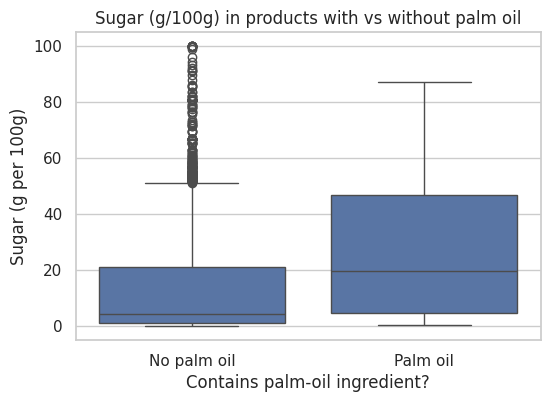

,sugars_100g
has_palm_oil,
False,15.000686
True,26.178947


In [ ]:
df_small["has_palm_oil"] = df_small["palm_oil_count"] > 0

plt.figure(figsize=(6,4))
sns.boxplot(
    data=df_small,
    x="has_palm_oil",
    y="sugars_100g"
)
plt.title("Sugar (g/100g) in products with vs without palm oil")
plt.xlabel("Contains palm-oil ingredient?")
plt.ylabel("Sugar (g per 100g)")
plt.xticks([0,1], ["No palm oil", "Palm oil"])
plt.show()

df_small.groupby("has_palm_oil")["sugars_100g"].mean()

##‼️ Conclusion

From this UK packaged food dataset, a few clear patterns appear:

- **Sugar is everywhere.** Even outside obvious treats, lots of everyday products contain 10–20 g of sugar per 100 g.
- **Snacks are the real sugar bombs.** Sugary snacks and some “plant-based foods and beverages” sit at the top, with many products in the 30–50 g per 100 g range.
- **Lower fat doesn’t always mean lower sugar.** The scatter plot of sugar vs fat shows plenty of points with **low fat but high sugar**, which fits the idea that some “lighter” or “healthier” options rely on sugar instead of fat for taste.
- **Sugar and salt don’t go hand-in-hand.** Most salty products cluster at low sugar levels – think crisps, ready meals, meats – so the worst offenders tend to be either salty or sugary, not both at once.
- **More additives, more sugar.** On average, products with many additives have higher sugar per 100 g. Highly processed foods in this dataset are often also the sweetest.
- **Palm-oil products are sweeter.** The boxplot comparing palm-oil vs non-palm-oil products shows that palm-oil items have a noticeably higher average sugar content.

### Key Insight

For UK packaged foods in this sample, **high sugar is strongly linked with ultra-processed, convenience products** – especially snacks with lots of additives and palm-oil ingredients. It’s not just a “dessert problem”; it’s a *packaged food* problem.

### What this suggests

- Simply choosing “low fat” or “plant-based” isn’t enough – **checking the sugar per 100 g matters more** than the marketing on the front.
- Products with long ingredient lists and multiple additives are a good red flag for **hidden sugar**.
- If you want to reduce sugar without tracking every gram, a simple rule from this analysis would be:
  - Fewer additives  
  + No palm oil  
  + Short ingredients list  
  = **Much lower chance** of being a high-sugar product.

This project is only one snapshot of the Open Food Facts database, but it shows how data science can turn the back of the packet into something we can actually understand – and question.